In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import resnet50

# Classifying Images using Resnet50

## Create model

In [ ]:
model = resnet50.ResNet50(include_top=True, weights='imagenet')

102967424/102967424 [==============================] - 28s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## Giraffe image

In [ ]:
# Read image
giraffe = tf.io.read_file('Giraffe_Mikumi_National_Park.jpg')
giraffe = tf.image.decode_jpeg(giraffe)

In [ ]:
# We notice preprocessing does not resize
resnet50.preprocess_input(giraffe)

<tf.Tensor: shape=(1858, 1469, 3), dtype=uint8, numpy=
array([[[237, 234, 221],
        [237, 234, 221],
        [238, 235, 222],
        ...,
        [ 59,  44,  36],
        [ 59,  44,  36],
        [ 60,  45,  37]],

       [[236, 233, 220],
        [237, 234, 221],
        [238, 235, 222],
        ...,
        [ 57,  42,  34],
        [ 57,  42,  34],
        [ 57,  42,  34]],

       [[238, 232, 220],
        [239, 233, 221],
        [241, 235, 223],
        ...,
        [ 59,  44,  36],
        [ 58,  43,  35],
        [ 58,  43,  35]],

       ...,

       [[193, 239, 224],
        [200, 246, 231],
        [215,   4, 248],
        ...,
        [ 41,  70,  68],
        [ 32,  61,  59],
        [ 28,  55,  53]],

       [[212, 249, 240],
        [236,  20,  10],
        [233,  17,   7],
        ...,
        [ 43,  69,  70],
        [ 38,  64,  65],
        [ 33,  59,  60]],

       [[216, 251, 245],
        [252,  33,  26],
        [  3,  40,  33],
        ...,
        [ 41,  67, 

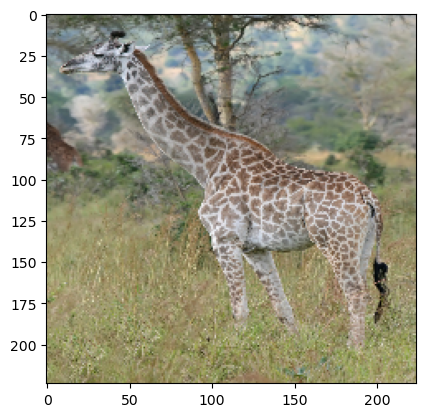

In [ ]:
# Manual resize and set dtype
giraffe = tf.image.resize(giraffe, (224, 224))
giraffe = tf.cast(giraffe, tf.int32)

plt.imshow(giraffe)
plt.show()

In [ ]:
# preprocess
giraffe_batch = tf.expand_dims(giraffe, 0)
giraffe_batch = resnet50.preprocess_input(giraffe_batch)

In [ ]:
predictions = model.predict(giraffe_batch)

1/1 [==============================] - 0s 262ms/step


In [ ]:
resnet50.decode_predictions(predictions, top=10)

[[('n02422699', 'impala', 0.19322237),
  ('n02130308', 'cheetah', 0.16944225),
  ('n02423022', 'gazelle', 0.119873054),
  ('n02437616', 'llama', 0.09037523),
  ('n01518878', 'ostrich', 0.08007611),
  ('n02128385', 'leopard', 0.07622168),
  ('n01675722', 'banded_gecko', 0.07323417),
  ('n02391049', 'zebra', 0.023013331),
  ('n02117135', 'hyena', 0.022262454),
  ('n02018795', 'bustard', 0.020523876)]]

Notice that the prediction is incorrect. Lets next try with a different animal and picture.

## Lion image

1/1 [==============================] - 0s 205ms/step
[[('n02129165', 'lion', 0.9999964), ('n02106030', 'collie', 1.7724959e-06), ('n02130308', 'cheetah', 8.693621e-07), ('n02105855', 'Shetland_sheepdog', 5.871212e-07), ('n02129604', 'tiger', 1.5013633e-07), ('n02128385', 'leopard', 4.4237172e-08), ('n02437312', 'Arabian_camel', 3.3803893e-08), ('n02391049', 'zebra', 2.3954142e-08), ('n02422699', 'impala', 1.8873214e-08), ('n02412080', 'ram', 1.7170855e-08)]]


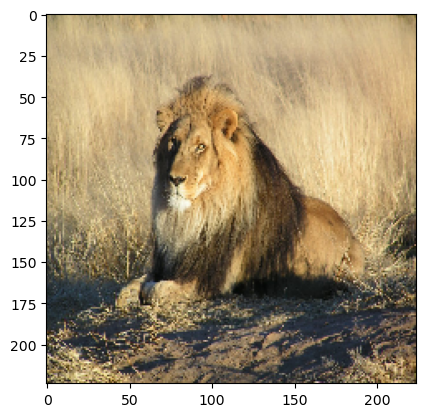

In [ ]:
# Read
lion = tf.image.decode_jpeg(tf.io.read_file('Lion_waiting_in_Namibia.jpg'))

# Resize
lion = tf.cast(tf.image.resize(lion, (224, 224)), tf.int32)

# Preprocess
lion_batch = tf.expand_dims(lion, 0)
lion_batch = resnet50.preprocess_input(lion_batch)

# Predict
print(resnet50.decode_predictions(model.predict(lion_batch), top=10))

plt.imshow(lion)
plt.show()

This result is much better!